In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stdperfomace11/student+performance - Copy/.student.zip_old
/kaggle/input/stdperfomace11/student+performance - Copy/student/student-merge.R
/kaggle/input/stdperfomace11/student+performance - Copy/student/student.txt
/kaggle/input/stdperfomace11/student+performance - Copy/student/student-por1.xlsx
/kaggle/input/stdperfomace11/student+performance - Copy/student/student-mat1.xlsx


In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

# Import the required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing data from CSV file into pandas dataframe(df_math)

df_math=pd.read_excel("/kaggle/input/stdperfomace11/student+performance - Copy/student/student-mat1.xlsx")

df_math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
#Check out the first few rows of the data

df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#importing data from CSV file into pandas dataframe(df_por)

df_por=pd.read_excel("/kaggle/input/stdperfomace11/student+performance - Copy/student/student-por1.xlsx")

df_por

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


### Elementary statistics associated with the data

In [6]:
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


### Presence of null objects and datatypes

In [7]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

## Feature Engineering
Categorical Output- Pass Vs Fail

A student fails if he/she gets below 10

In [8]:
def pass_classify(row):
    if row.G3>=10:
        return 1
    else:
        return 0
    
pass_=df_math.apply(pass_classify,axis='columns')
#print(pass_fail)
print(pass_.value_counts())

1    265
0    130
Name: count, dtype: int64


#### Categorical Output- Grades: A,B,C,D,F

In [9]:
def grade_classify(row):
    if row.G3>=16:
        return 'A'
    elif row.G3>=14:
        return 'B'
    elif row.G3>=12:
        return 'C'
    elif row.G3>=10:
        return 'D'
    else:
        return 'F'
    

grades=df_math.apply(grade_classify,axis='columns')
print(grades.value_counts())

F    130
D    103
C     62
B     60
A     40
Name: count, dtype: int64


#### Helper function to find percentage of people passed and grade percentage

In [10]:
def get_percent(col):
    return (col.value_counts()/col.value_counts().sum())*100
pass_percent=get_percent(pass_)
print(pass_percent)

1    67.088608
0    32.911392
Name: count, dtype: float64


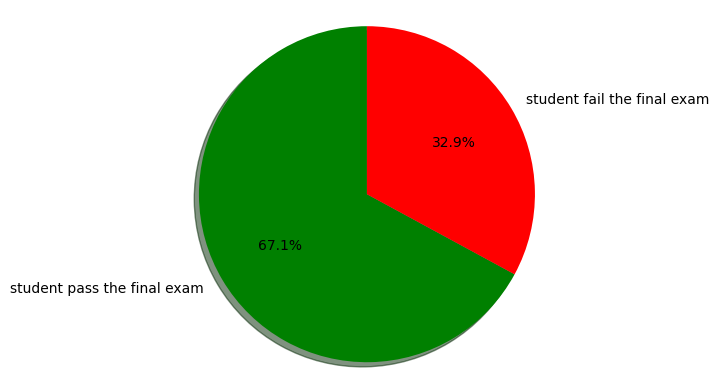

In [11]:
labels = 'student pass the final exam ', 'student fail the final exam'
sizes = [265, 130]
colors=['green','red']
fig1, ax1 = plt.subplots()
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [12]:
grade_percent=get_percent(grades)
print(grade_percent)

F    32.911392
D    26.075949
C    15.696203
B    15.189873
A    10.126582
Name: count, dtype: float64


<Axes: xlabel='G3'>

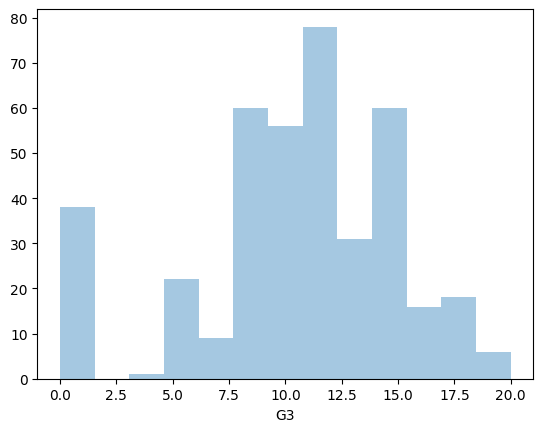

In [13]:
#Plot graph
import seaborn as sns
sns.distplot(a=df_math['G3'], kde=False)

- 1/3rd of the people have failed in the exam, which is quite surprising.
- More than half the people have recieved a D and a F grade

In [14]:
df_math['grades']=grades
print(grades)

0      F
1      F
2      D
3      B
4      D
      ..
390    F
391    A
392    F
393    D
394    F
Length: 395, dtype: object


In [15]:
df_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### remove all the continous attributes from our dataframe

In [16]:
df_math_cat = df_math[[i for i in df_math.columns if i not in ('G1','G2','G3','absences')]]
df_math_cat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,grades
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,F
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,F
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,D
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,D


In [17]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in df_math_cat.columns :
  data_encoded[i]=label.fit_transform(df_math_cat[i])

In [18]:
data_encoded.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,grades
0,0,0,3,1,0,0,4,4,0,4,...,1,0,0,3,2,3,0,0,2,4
1,0,0,2,1,0,1,1,1,0,2,...,1,1,0,4,2,2,0,0,2,4
2,0,0,0,1,1,1,1,1,0,2,...,1,1,0,3,2,1,1,2,2,3
3,0,0,0,1,0,1,4,2,1,3,...,1,1,1,2,1,1,0,0,4,1
4,0,0,1,1,0,1,3,3,2,2,...,1,0,0,3,2,1,0,1,4,3


### Building of the Cramer's V function

In [19]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [20]:
# Building of the matrix
rows= []

for var1 in data_encoded:
  col = []
  for var2 in data_encoded :
    cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df_math_var = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



df_math_var


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,grades
school,0.98,0.00,0.19,0.07,0.00,0.00,0.05,0.01,0.01,0.02,...,0.00,0.02,0.00,0.01,0.01,0.01,0.03,0.03,0.01,0.01
sex,0.00,0.99,0.02,0.00,0.01,0.00,0.01,0.01,0.04,0.01,...,0.02,0.00,0.01,0.01,0.07,0.01,0.08,0.09,0.02,0.02
age,0.19,0.02,1.00,0.05,0.01,0.03,0.02,0.02,0.02,0.02,...,0.08,0.04,0.04,0.01,0.02,0.02,0.05,0.03,0.02,0.02
address,0.07,0.00,0.05,0.99,0.00,0.00,0.03,0.02,0.03,0.01,...,0.00,0.04,0.00,0.00,0.01,0.02,0.02,0.01,0.01,0.02
famsize,0.00,0.01,0.01,0.00,0.99,0.02,0.01,0.01,0.01,0.01,...,0.00,0.00,0.00,0.00,0.01,0.00,0.03,0.01,0.00,0.01
Pstatus,0.00,0.00,0.03,0.00,0.02,0.97,0.03,0.01,0.01,0.01,...,0.00,0.00,0.00,0.01,0.02,0.01,0.01,0.02,0.01,0.01
Medu,0.05,0.01,0.02,0.03,0.01,0.03,1.00,0.13,0.14,0.03,...,0.04,0.05,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02
Fedu,0.01,0.01,0.02,0.02,0.01,0.01,0.13,1.00,0.04,0.07,...,0.04,0.02,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01
Mjob,0.01,0.04,0.02,0.03,0.01,0.01,0.14,0.04,1.00,0.05,...,0.02,0.07,0.01,0.01,0.02,0.01,0.01,0.00,0.01,0.02
Fjob,0.02,0.01,0.02,0.01,0.01,0.01,0.03,0.07,0.05,1.00,...,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01


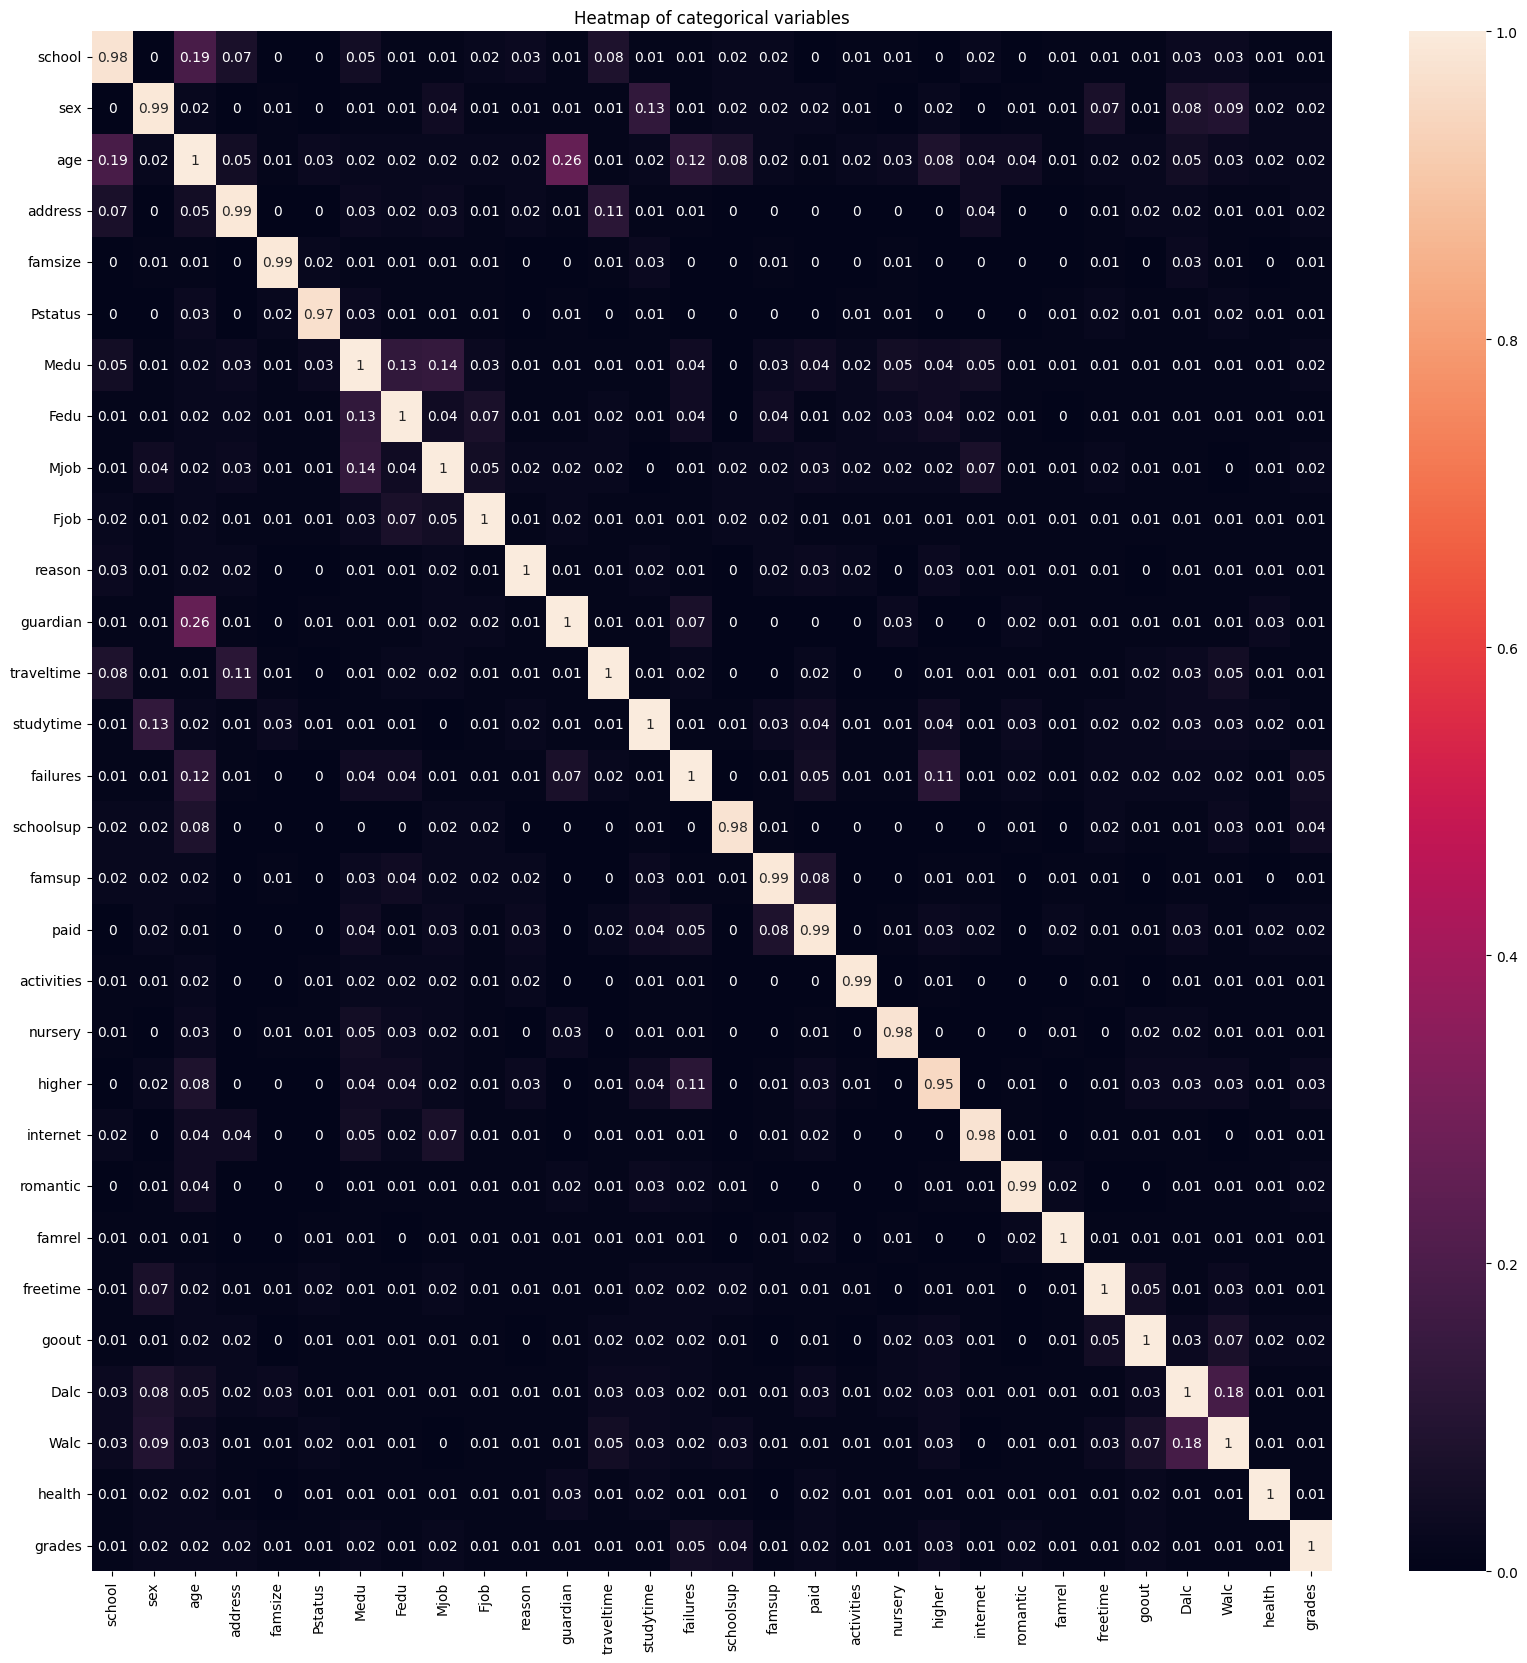

In [21]:
# Add a heatmap to the matrix
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.title("Heatmap of categorical variables")
sns.heatmap(data=df_math_var,vmin=0, vmax=1,annot=True)

plt.show()

We see that there is almost a negligible relationship with all the categorical attributes and grades

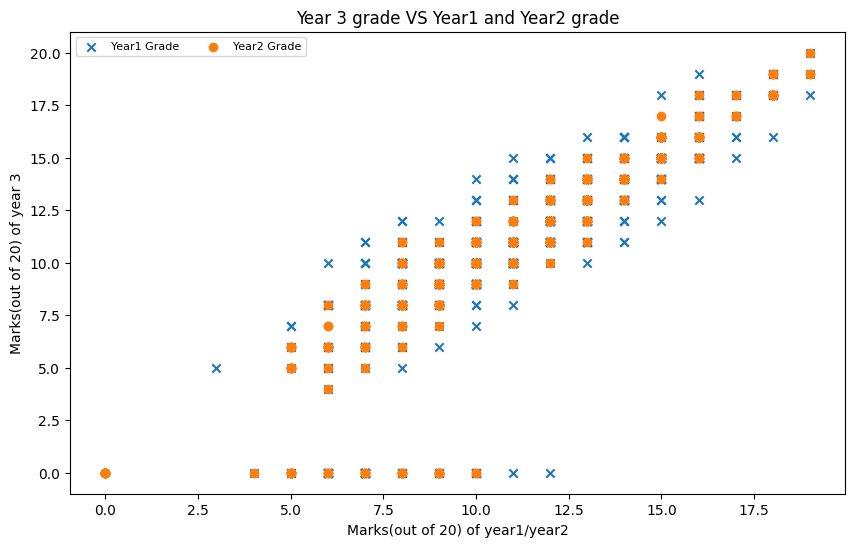

In [22]:
#Scatter Plots

x1=df_math['G1']
x2=df_math['G2']
y=df_math['G3']
plt.figure(figsize=(10,6))
plt.title("Year 3 grade VS Year1 and Year2 grade")
g1=plt.scatter(x1,y,marker='x')
g2=plt.scatter(x2,y,marker='o')
plt.legend((g1, g2),
           ('Year1 Grade', 'Year2 Grade'),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=8)
plt.xlabel("Marks(out of 20) of year1/year2")
plt.ylabel("Marks(out of 20) of year 3")
plt.show() 

The previous grades G1 and G2 seem to be positively linearly correlated to G3

#### No of absent days VS Marks scatter plot

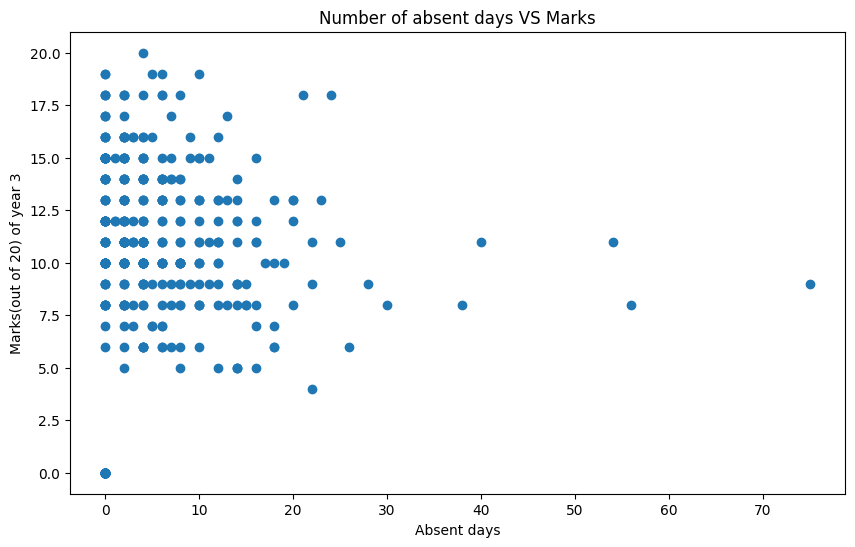

In [23]:
plt.figure(figsize=(10,6))
plt.title("Number of absent days VS Marks")
plt.scatter(df_math["absences"],df_math["G3"])

plt.ylabel("Marks(out of 20) of year 3")
plt.xlabel("Absent days")
plt.show()

There doesn't seem to be much a relation with no of absent days and marks. However since most students have taken only between 0 to 10 days of leave, we might not have enough information to conclude much


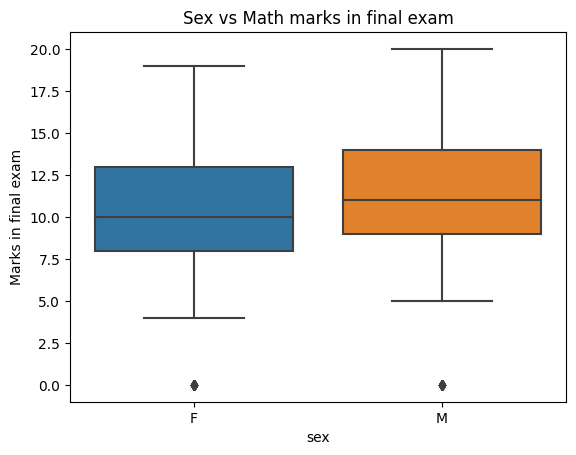

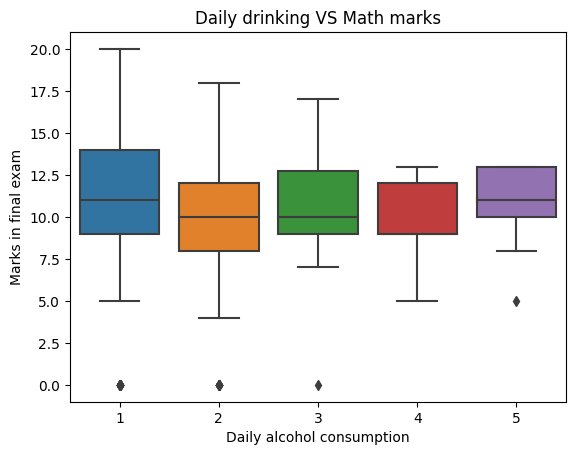

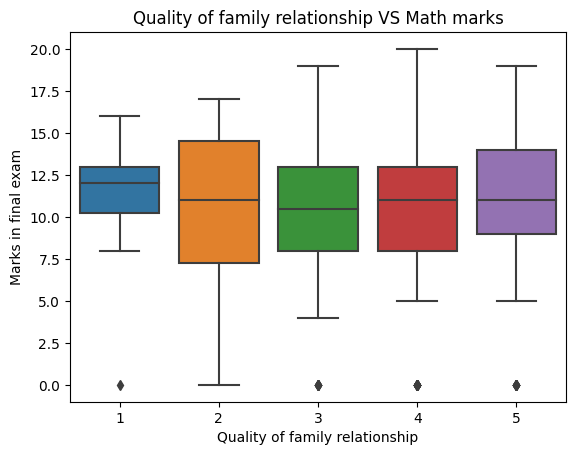

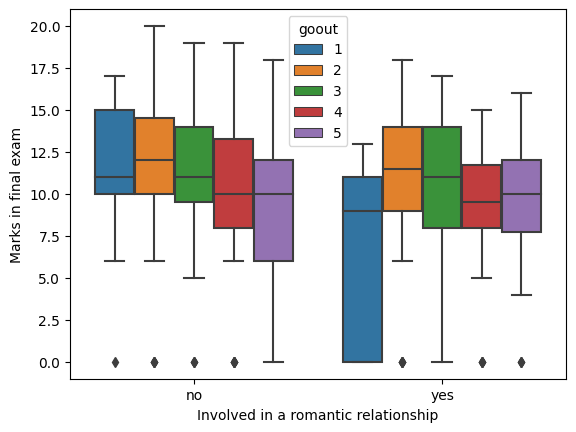

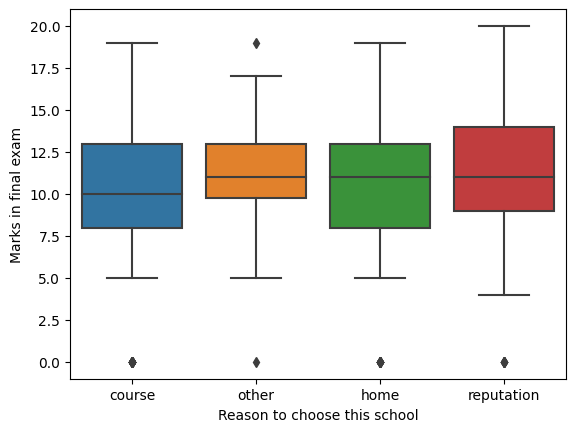

In [24]:
# Boxplots

#plt.figure(figsize=(12,7))
plt.title("Sex vs Math marks in final exam")
ax = sns.boxplot(x="sex", y="G3", data=df_math)
plt.ylabel("Marks in final exam")
plt.show()


plt.title("Daily drinking VS Math marks")
ax = sns.boxplot(x="Dalc", y="G3",data=df_math)
plt.xlabel("Daily alcohol consumption")
plt.ylabel("Marks in final exam")
plt.show()

plt.title("Quality of family relationship VS Math marks")
ax=sns.boxplot(x="famrel",y="G3",data=df_math)
plt.ylabel("Marks in final exam")
plt.xlabel("Quality of family relationship")
plt.show()


ax = sns.boxplot(x="romantic", y="G3", hue="goout",
                 data=df_math)
plt.ylabel("Marks in final exam")
plt.xlabel("Involved in a romantic relationship")
plt.show()


ax=sns.boxplot(x="reason",y="G3",data=df_math)
plt.ylabel("Marks in final exam")
plt.xlabel("Reason to choose this school")
plt.show()

The boxplots don't give much information as the categorical factors don't seem to be correlated with the final exam marks

#### Converting Categorical data to Numerical data

We want to use label encoding for ONLY those labels in which the labels can be compared to one another. For example if the labels were short and tall, we would assign 0 to short and 1 to tall

We label encode the 'romantic' attribute('romantic'='yes' if student is in a romantic relationship, else it is 'no'). We want to assign 0 to 'no' and 1 to 'yes'



In [25]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in columns

romantic_no=label_encoder.fit_transform(df_math['romantic'])

print(romantic_no[0])
print(df_math['romantic'][0])

0
no


Our assignment, by luck turned out to be correct. We could have gotten 1 to be assigned to no instead of 0, then we should have modified the labelling

In [26]:
df_math['romantic']=romantic_no

Converting more categorical labels to numeric(by checking if encoding is right)

In [27]:
famsize_no=label_encoder.fit_transform(df_math['famsize'])
df_math['famsize']=1-famsize_no

activities_no=label_encoder.fit_transform(df_math['activities'])
df_math['activites']=activities_no

df_math['Pstatus']=label_encoder.fit_transform(df_math['Pstatus'])
df_math['nursery']=label_encoder.fit_transform(df_math['nursery'])
df_math['internet']=label_encoder.fit_transform(df_math['internet'])
df_math['higher']=label_encoder.fit_transform(df_math['higher'])
df_math['schoolsup']=label_encoder.fit_transform(df_math['schoolsup'])
df_math['famsup']=label_encoder.fit_transform(df_math['famsup'])
df_math['paid']=label_encoder.fit_transform(df_math['paid'])

df_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,goout,Dalc,Walc,health,absences,G1,G2,G3,grades,activites
0,GP,F,18,U,1,0,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,F,0
1,GP,F,17,U,1,1,1,1,at_home,other,...,3,1,1,3,4,5,5,6,F,0
2,GP,F,15,U,0,1,1,1,at_home,other,...,2,2,3,3,10,7,8,10,D,0
3,GP,F,15,U,1,1,4,2,health,services,...,2,1,1,5,2,15,14,15,B,1
4,GP,F,16,U,1,1,3,3,other,other,...,2,1,2,5,4,6,10,10,D,0


#### Bar Plots
- We first group the data based on the grades obtained by the student.
- We wish to see whether we can predict any attribute of the student given their grade.

#### Relationship Quotient Vs Grade
Relationship Quotient of a set of students is defined as the average no of students in that set in a romantic relationship

NameError: name 'grouped_df' is not defined

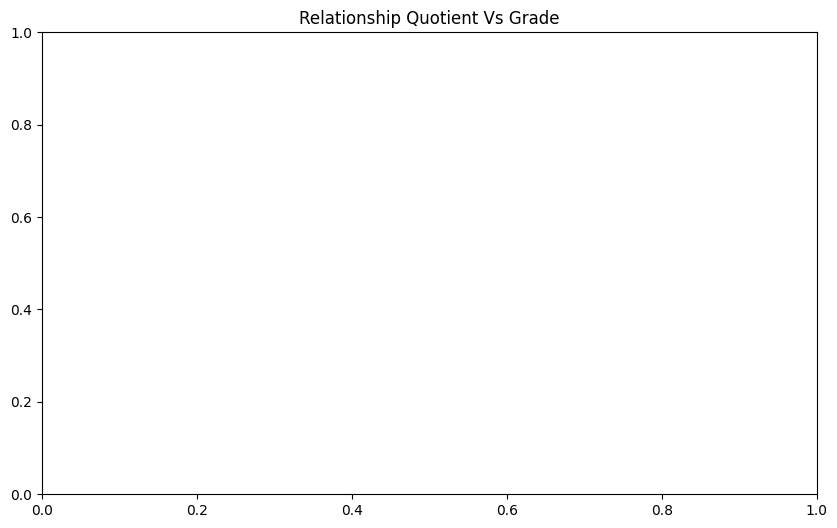

In [28]:
plt.figure(figsize=(10,6))
plt.title("Relationship Quotient Vs Grade")
sns.barplot(x=["A","B","C","D","F"], y=grouped_df['romantic'].mean())
plt.ylabel("Relationship Quotient")
plt.xlabel("Grade")

- The students that get A grade seem to be less likely to be in a romantic relationship than others

#### Free Time Vs Grade

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Free Time Vs Grade")
sns.barplot(x=["A","B","C","D","F"], y=grouped_df['freetime'].mean())
plt.ylabel("Free Time")
plt.xlabel("Grade")

- There doesn't seem to be any relationship amongst the variables (This was what we concluded after observing the heat map)

#### Go out Vs Grade

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Goout Vs Grade")
sns.barplot(x=["A","B","C","D","F"], y=grouped_df['goout'].mean())
plt.ylabel("GO out")
plt.xlabel("Grade")